From https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target/output : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot
import sklearn as sk
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
# importing the data to a dataframe 
df = pd.read_csv("../data/heart-attack-prediction/heart.csv") 
SAMPLE_SIZE = len(df.index)

In [4]:
#Lets use output or target as preiction label

# Specify the data 3 skip the quality out for y
X= df.loc[:, :'thall']
y = df.loc[:,['output']]
print(X.head())
print(y.head())
print("shape of X",X.to_numpy().shape)
print("shape of y",y.to_numpy().shape)

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  
   output
0       1
1       1
2       1
3       1
4       1
shape of X (303, 13)
shape of y (303, 1)


In [59]:
# Scale the Feature data
scaler = sk.preprocessing.StandardScaler().fit(X)
X_s = scaler.transform(X)
# Convert the  validation data 
num_classes = 2
y_s = keras.utils.to_categorical(y, num_classes)

In [60]:
print("shape of X_s",X_s.shape)
print("shape of y_s",y_s.shape)
print("X_s",X_s[1])
print("y_s",y_s[1])
# Preprocess the data (these are NumPy arrays)
X_s = X_s.reshape(SAMPLE_SIZE, 13).astype("float32") 
y_s = y_s.reshape(SAMPLE_SIZE, 2).astype("float32") 
print("shape of X_s",X_s.shape)
print("shape of y_s",y_s.shape)
print("X_s",X_s[1])
print("y_s",y_s[1])

shape of X_s (303, 13)
shape of y_s (303, 2)
X_s [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
  0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
 -0.51292188]
y_s [0. 1.]
shape of X_s (303, 13)
shape of y_s (303, 2)
X_s [-1.9153129   0.68100524  1.0025771  -0.09273779  0.07219949 -0.41763455
  0.89896226  1.6334715  -0.69663054  2.1225727  -2.2745786  -0.71442884
 -0.51292187]
y_s [0. 1.]


In [61]:
dataset = tf.data.Dataset.from_tensor_slices((X_s, y_s))

In [62]:
for element in dataset:
  print(element)
  break

(<tf.Tensor: shape=(13,), dtype=float32, numpy=
array([ 0.9521966 ,  0.68100524,  1.973123  ,  0.7639558 , -0.2563337 ,
        2.394438  , -1.0058318 ,  0.01544279, -0.69663054,  1.0873381 ,
       -2.2745786 , -0.71442884, -2.1488726 ], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 1.], dtype=float32)>)


In [63]:
train_size = int(0.7 * SAMPLE_SIZE)
val_size = int(0.15 * SAMPLE_SIZE)
test_size = int(0.15 * SAMPLE_SIZE)
print("train_size=",train_size,"val_size=",val_size,"test_size=",test_size)
dataset = dataset.shuffle(SAMPLE_SIZE)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

# for tf data set batch size is given here
batch_size = 128
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size)
val_dataset = val_dataset.shuffle(buffer_size=1024).batch(batch_size)

train_size= 212 val_size= 45 test_size= 45


In [64]:
#https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax

inputs = keras.Input(shape=(13,), name="inputs")
flat = keras.layers.Flatten()(inputs)
x = layers.Dense(64, activation="relu", name="dense_1")(flat)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(2, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

optimizer = "adam"
loss="categorical_crossentropy" 
mertics_key = "accuracy"
epochs = 100 

In [65]:
model.compile( loss=loss, optimizer=optimizer, metrics=[mertics_key])


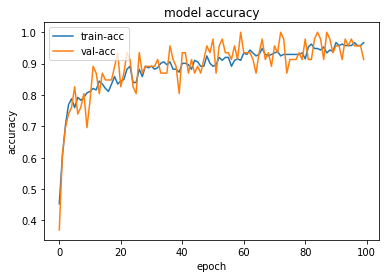

In [66]:
tf.keras.backend.clear_session()
# Train the model          
history =model.fit(train_dataset, epochs=epochs,verbose=0,validation_data=val_dataset)
model.save_weights('hearattack-prediction.h5')
#print(history.history[mertics_key])
#pyplot.plot(history.history['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train-acc', 'val-acc'], loc='upper left')
pyplot.show()

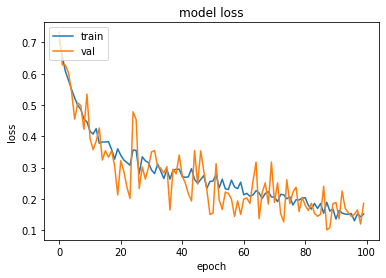

In [67]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

In [68]:
score = model.evaluate(test_dataset, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])


1/1 [==============================] - 0s 14ms/step - loss: 0.1756 - accuracy: 0.9556
Test loss: 0.17556701600551605
Test accuracy: 0.9555555582046509


In [69]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
# what we want is something like test loss, test acc: [0.14795634150505066, 0.9563999772071838]
n=1
k= X_s[np.newaxis,n,::]
print("X_test_s",k)
j = y_s[n]
print("original list",j)
pred = model.predict(k)
print("original",j[1],"Prediction ",np.argmax(pred))
print("Prediction List",pred)

X_test_s [[-1.92  0.68  1.   -0.09  0.07 -0.42  0.9   1.63 -0.7   2.12 -2.27 -0.71
  -0.51]]
original list [0. 1.]
original 1.0 Prediction  1
Prediction List [[0.12 0.88]]


In [70]:
n=2
k= X_s[np.newaxis,n,::]
j = y_s[n]
pred = model.predict(k)
print("original",j[1],"Prediction ",np.argmax(pred))
print("Prediction List",pred)
n=300
k= X_s[np.newaxis,n,::]
j = y_s[n]
pred = model.predict(k)
print("original",j[1],"Prediction ",np.argmax(pred))
print("Prediction List",pred)

original 1.0 Prediction  1
Prediction List [[0. 1.]]
original 0.0 Prediction  0
Prediction List [[1. 0.]]
